# Part 2: EDA and OLS Regression

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error


/Users/emilygeller/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Exploratory Data Analysis



In [2]:
with open("countries_data_munged.pkl", 'rb') as picklefile: 
    countries = pickle.load(picklefile)

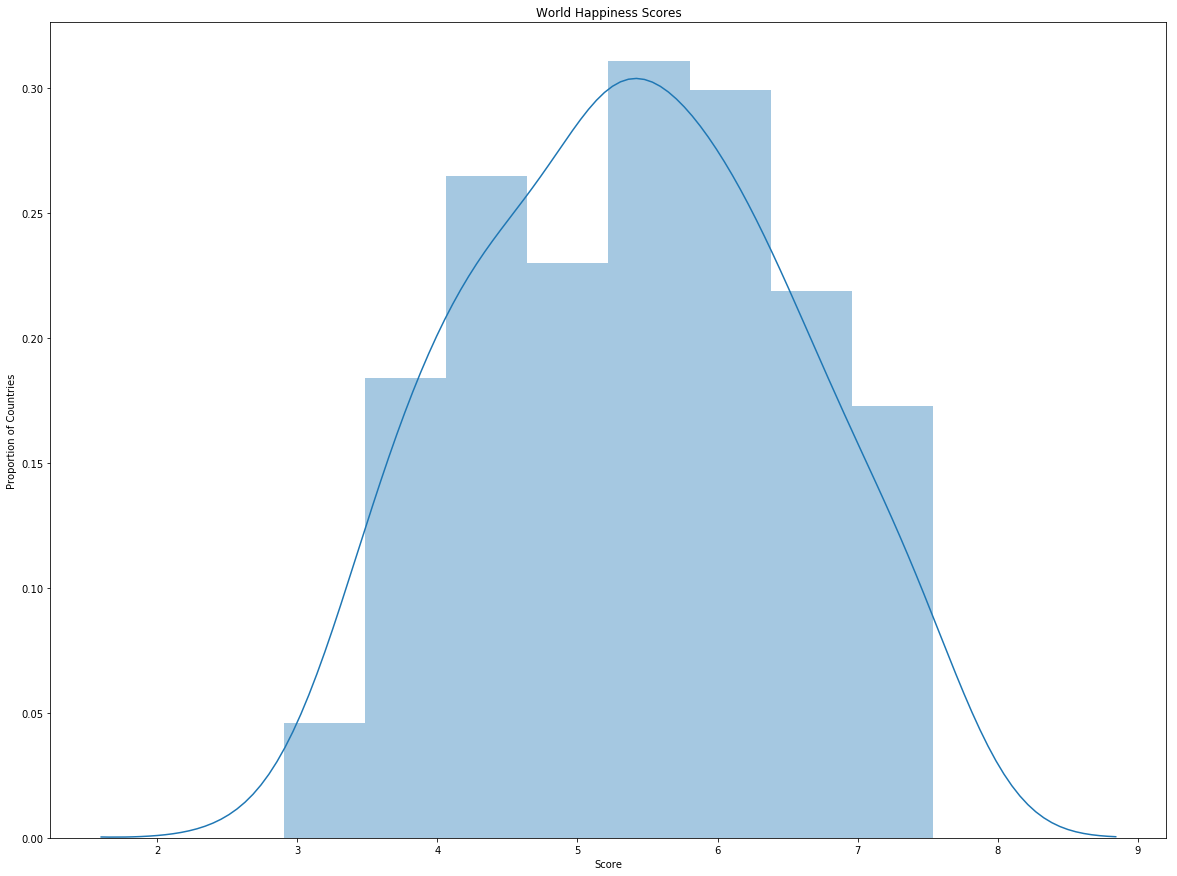

In [3]:
fig, ax = plt.subplots(figsize=(20,15))
sns.distplot(countries.Score, hist = True, label = 'World Happiness Scores')
ax.set_ylabel('Proportion of Countries')
ax.set_title('World Happiness Scores')
fig.savefig('CountryScoreDistribution');

In [4]:
countries.describe()

,Score,Social support,Freedom to make life choices,Generosity,Trust,Population,Land_Area,Support_Ratio,Urbanization,Get_Median_Age,...,Fertility_Rate,Hospital_Bed_Density,Access_To_Clean_Water,Obesity_Rate,School_Life_Expectancy,GDP,GDP_per_capita,Unemployment_Rate,Electrification_Rate,Population Density
count,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,1.500000e+02,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,150.000000,150.000000,1.500000e+02
mean,5.388247,1.199147,0.409927,0.247507,0.123207,4.877966e+07,8.270407e+05,11.999329,0.604615,30.388000,...,2.598243,3.089781,0.883374,0.184510,13.572519,1.633023e+11,21806.711409,0.112098,0.794074,7.169172e+05
std,1.117987,0.273863,0.151343,0.136247,0.103005,1.576175e+08,2.055728e+06,10.456041,0.223619,9.116243,...,1.321674,2.432751,0.150722,0.089493,2.924166,2.204976e+11,21955.570342,0.127288,0.316021,8.601183e+06
min,2.905000,0.396000,0.000000,0.000000,0.000000,3.397470e+05,1.000000e+00,2.300000,0.083000,15.400000,...,0.830000,0.100000,0.317000,0.021000,5.000000,1.056000e+09,800.000000,0.003000,0.010000,1.974981e+00
25%,4.519250,1.049250,0.307500,0.153500,0.057000,5.327853e+06,5.478225e+04,4.800000,0.433500,22.550000,...,1.657500,1.225000,0.826250,0.088250,12.000000,1.992750e+10,5550.000000,0.043000,0.675000,3.569117e+01
50%,5.302000,1.259000,0.438500,0.232000,0.089000,1.147905e+07,2.152165e+05,10.250000,0.607000,29.300000,...,2.080000,2.650000,0.953000,0.203500,13.572519,6.430000e+10,14800.000000,0.070000,0.990000,8.400662e+01
75%,6.152250,1.419000,0.519750,0.325750,0.152500,3.691537e+07,6.531885e+05,16.750000,0.789000,39.275000,...,3.010000,4.300000,0.997000,0.246750,15.000000,2.152250e+11,31425.000000,0.118750,1.000000,2.005088e+02
max,7.537000,1.611000,0.658000,0.838000,0.464000,1.379303e+09,1.637774e+07,83.400000,1.000000,47.300000,...,6.490000,13.700000,1.000000,0.379000,20.000000,9.261000e+11,124900.000000,0.950000,1.000000,1.053500e+08


In [5]:
countries.sort_values('Score', ascending = False).head(10)

,Country,Score,Social support,Freedom to make life choices,Generosity,Trust,Population,Land_Area,Support_Ratio,Urbanization,...,Fertility_Rate,Hospital_Bed_Density,Access_To_Clean_Water,Obesity_Rate,School_Life_Expectancy,GDP,GDP_per_capita,Unemployment_Rate,Electrification_Rate,Population Density
95,Norway,7.537,1.534,0.635,0.362,0.316,5320045.0,304282.0,4.0,0.810,...,1.85,3.85,1.000,0.231,18.000000,3.759000e+11,70600.0,0.040,1.0,17.483929
33,Denmark,7.522,1.551,0.626,0.355,0.401,5605948.0,42434.0,3.4,0.880,...,1.73,3.50,1.000,0.197,19.000000,2.855000e+11,49600.0,0.058,1.0,132.109818
53,Iceland,7.504,1.611,0.627,0.476,0.154,339747.0,100250.0,4.8,0.943,...,2.00,3.18,1.000,0.219,20.000000,1.773000e+10,52100.0,0.028,1.0,3.388998
121,Switzerland,7.494,1.517,0.620,0.291,0.367,8236303.0,39997.0,3.7,0.741,...,1.56,5.00,1.000,0.195,16.000000,5.167000e+11,61400.0,0.030,1.0,205.923019
40,Finland,7.469,1.540,0.618,0.245,0.383,5518371.0,303815.0,3.1,0.845,...,1.75,4.53,1.000,0.222,19.000000,2.424000e+11,44000.0,0.087,1.0,18.163590
90,Netherlands,7.377,1.429,0.585,0.470,0.283,17084719.0,33893.0,3.6,0.915,...,1.78,4.70,1.000,0.204,18.000000,9.152000e+11,53600.0,0.051,1.0,504.078099
25,Canada,7.316,1.481,0.611,0.436,0.287,35623680.0,9093507.0,4.2,0.822,...,1.60,2.70,0.998,0.294,13.572519,1.764000e+09,48100.0,0.065,1.0,3.917485
91,New Zealand,7.314,1.548,0.614,0.500,0.383,4510327.0,264537.0,4.5,0.864,...,2.02,2.30,1.000,0.308,19.000000,1.857000e+11,38500.0,0.049,1.0,17.049891
6,Australia,7.284,1.510,0.602,0.478,0.301,23232413.0,7682300.0,4.4,0.897,...,1.77,3.90,1.000,0.290,20.000000,1.235000e+09,49900.0,0.056,1.0,3.024148
120,Sweden,7.284,1.478,0.613,0.385,0.384,9960487.0,410335.0,3.2,0.861,...,1.88,2.54,1.000,0.206,18.000000,5.217000e+11,51300.0,0.066,1.0,24.274037


In [6]:
countries.sort_values('Score').head(10)

,Country,Score,Social support,Freedom to make life choices,Generosity,Trust,Population,Land_Area,Support_Ratio,Urbanization,...,Fertility_Rate,Hospital_Bed_Density,Access_To_Clean_Water,Obesity_Rate,School_Life_Expectancy,GDP,GDP_per_capita,Unemployment_Rate,Electrification_Rate,Population Density
22,Burundi,2.905,0.630,0.060,0.204,0.084,11466756.0,25680.000000,21.1,0.127,...,5.99,1.900000,0.759,0.054,11.000000,7.985000e+09,800.0,0.112098,0.05,446.524766
125,Tanzania,3.349,1.042,0.390,0.354,0.066,53950935.0,885800.000000,16.6,0.330,...,4.77,0.700000,0.556,0.084,8.000000,1.628000e+11,3300.0,0.103000,0.24,60.906452
122,Syria,3.462,0.396,0.082,0.494,0.151,18028549.0,183630.000000,14.3,0.585,...,2.50,1.500000,0.901,0.278,9.000000,5.028000e+10,2900.0,0.500000,0.96,98.178669
106,Rwanda,3.471,0.946,0.582,0.253,0.455,11901484.0,24668.000000,20.1,0.307,...,3.87,1.600000,0.761,0.058,11.000000,2.461000e+10,2100.0,0.027000,0.21,482.466515
127,Togo,3.495,0.432,0.380,0.197,0.096,7965055.0,54385.000000,19.8,0.410,...,4.38,0.700000,0.631,0.084,12.000000,1.243000e+10,1600.0,0.069000,0.27,146.456836
48,Guinea,3.507,0.791,0.349,0.265,0.111,12413867.0,245717.000000,17.8,0.382,...,4.77,0.300000,0.768,0.077,9.000000,2.645000e+10,2000.0,0.028000,0.26,50.520994
71,Liberia,3.533,0.872,0.333,0.267,0.039,4689021.0,96320.000000,18.1,0.505,...,5.06,0.800000,0.756,0.099,13.572519,3.906000e+09,900.0,0.028000,0.10,48.681696
116,South Sudan,3.591,0.601,0.147,0.286,0.117,13026129.0,827040.656757,15.7,0.193,...,5.07,3.089781,0.587,0.066,13.572519,1.975000e+10,1500.0,0.112098,0.01,716917.184175
141,Yemen,3.593,0.935,0.249,0.104,0.057,28036829.0,527968.000000,19.8,0.358,...,3.63,0.700000,0.549,0.171,9.000000,6.895000e+10,2300.0,0.270000,0.48,53.103273
49,Haiti,3.603,0.640,0.030,0.489,0.100,10646714.0,27560.000000,13.3,0.609,...,2.72,1.300000,0.577,0.227,13.572519,1.988000e+10,1800.0,0.406000,0.38,386.310377


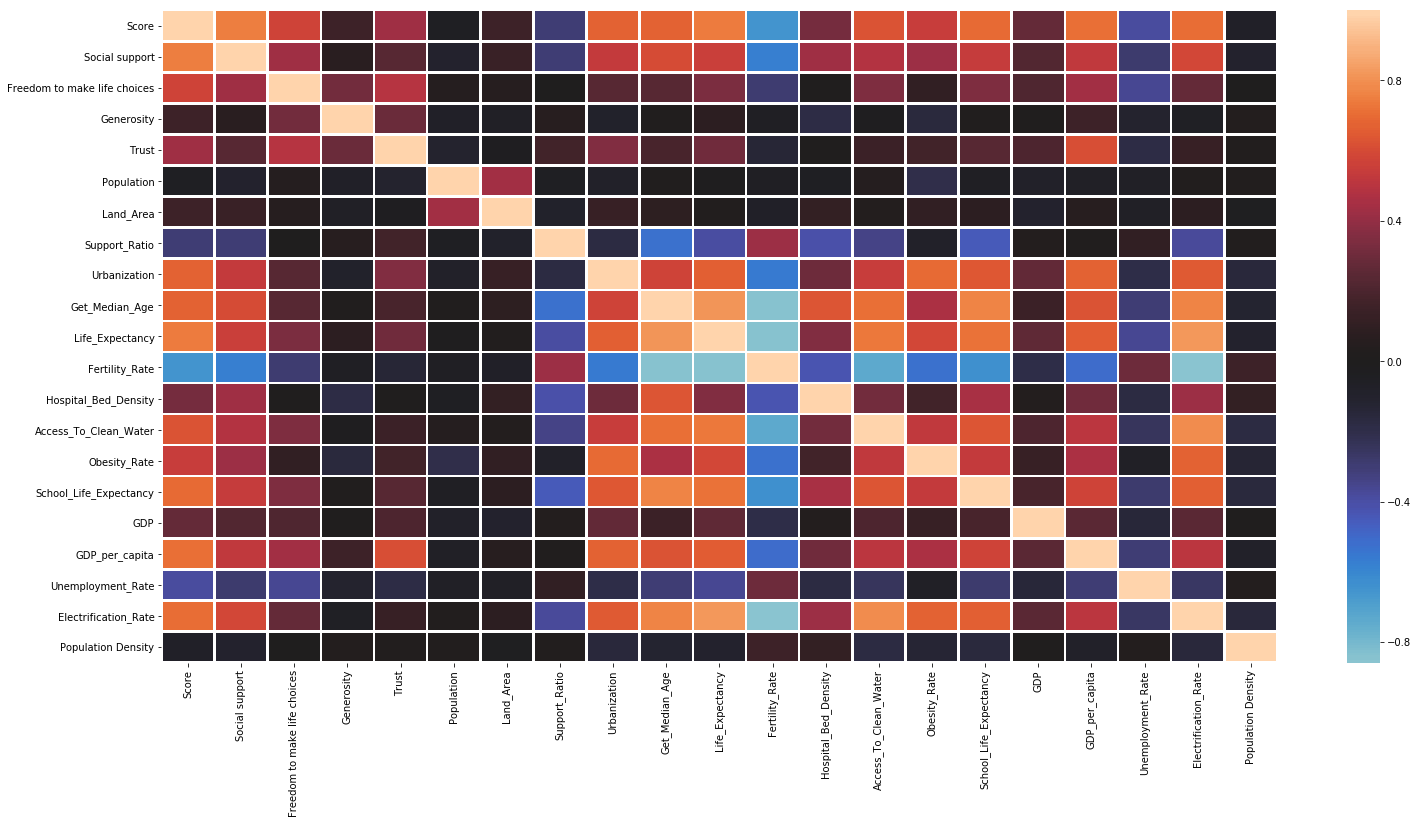

In [7]:


plt.figure(figsize = (25,12))

ax = sns.heatmap(countries.corr(),  linewidths=1.5, center = 0)
plt.savefig('firstcorrplot',bbox_inches='tight')

In [8]:
countries.corr().sort_values('Score', ascending = False).Score

Score                           1.000000
Social support                  0.749257
Life_Expectancy                 0.745372
GDP_per_capita                  0.713507
Electrification_Rate            0.703249
School_Life_Expectancy          0.698962
Get_Median_Age                  0.679875
Urbanization                    0.677217
Access_To_Clean_Water           0.624816
Freedom to make life choices    0.572776
Obesity_Rate                    0.549413
Trust                           0.432747
Hospital_Bed_Density            0.324390
GDP                             0.278664
Generosity                      0.157282
Land_Area                       0.151646
Population                     -0.042003
Population Density             -0.070205
Support_Ratio                  -0.292956
Unemployment_Rate              -0.381854
Fertility_Rate                 -0.653119
Name: Score, dtype: float64

Remove features with absolute correlation less than 0.3.

In [9]:
countries = countries.drop(['Population Density', 'GDP','Land_Area','Population','Generosity'], axis = 1)

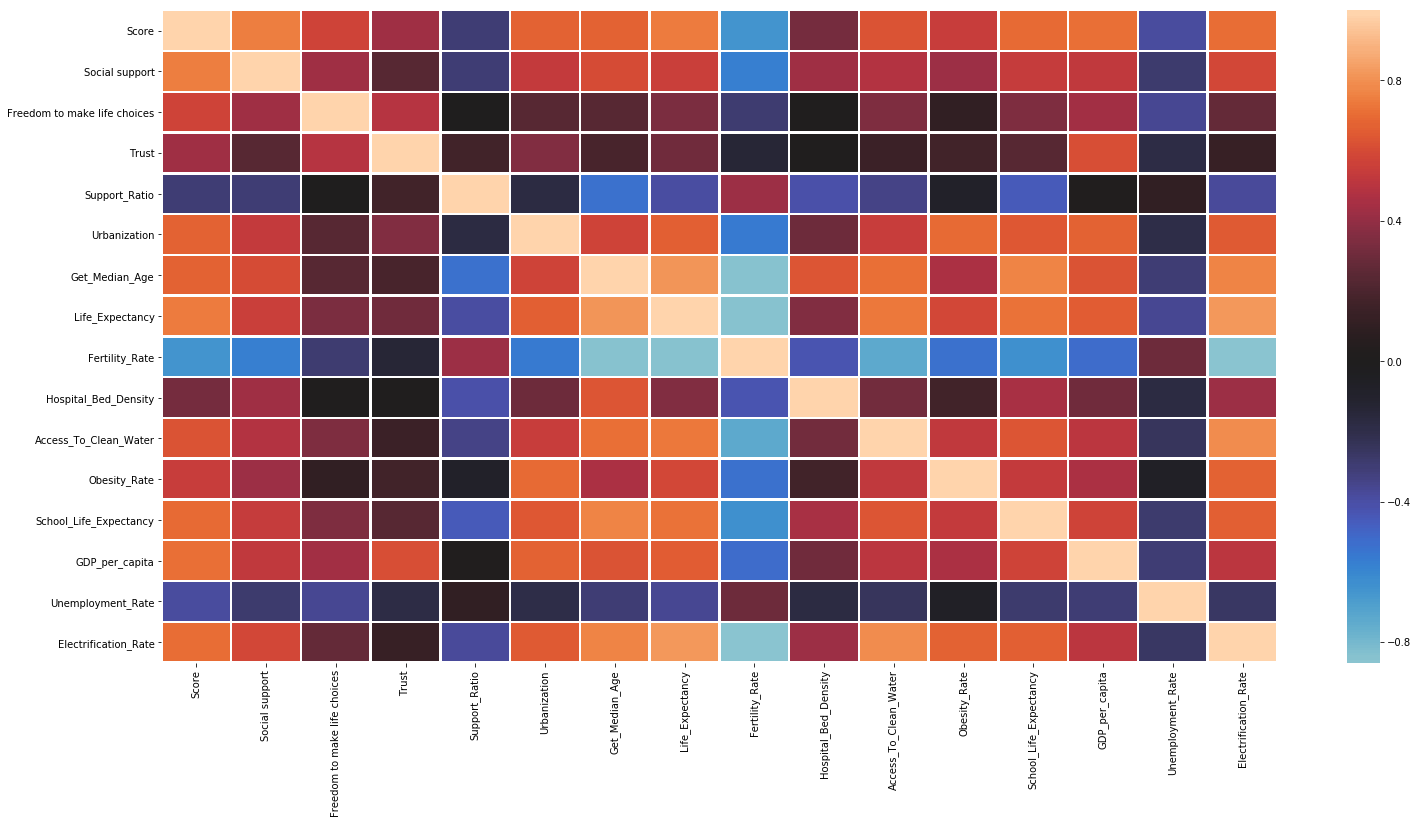

In [10]:
plt.figure(figsize = (25,12))

ax = sns.heatmap(countries.corr(),  linewidths=1.5, center = 0)
plt.savefig('secondcorrplot',bbox_inches='tight')

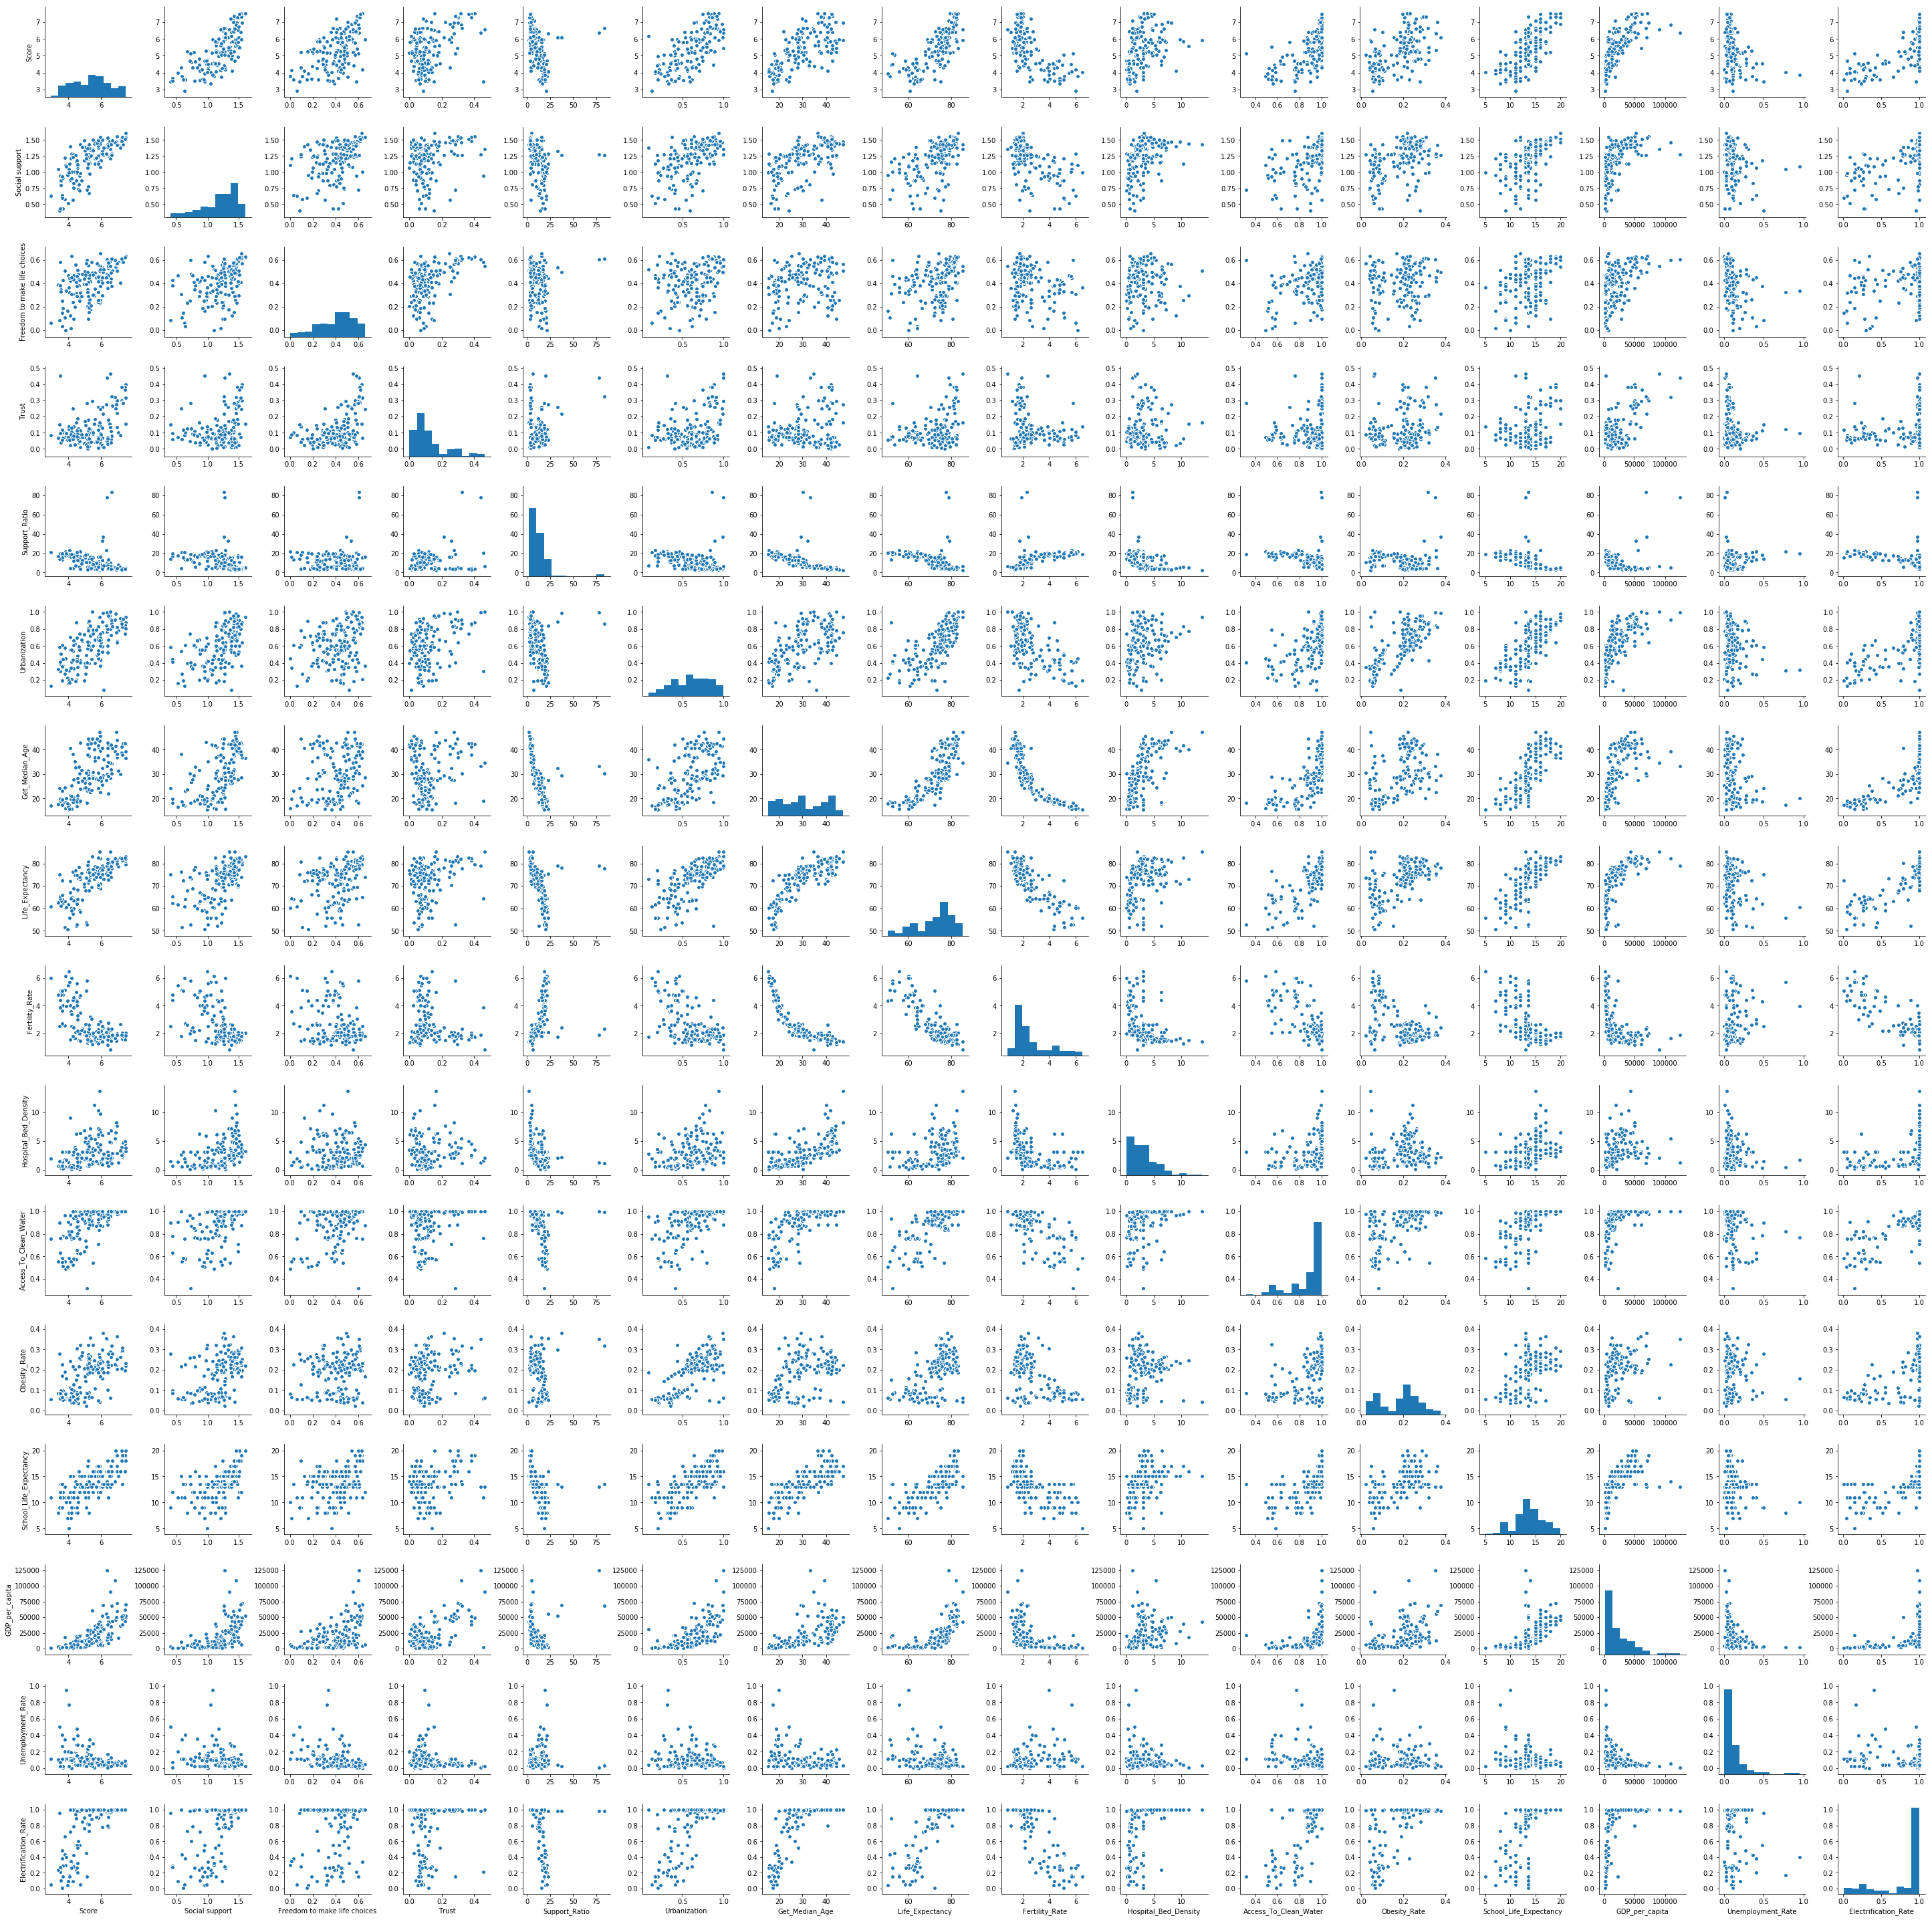

In [11]:
sns.pairplot(countries)

### Feature Exploration

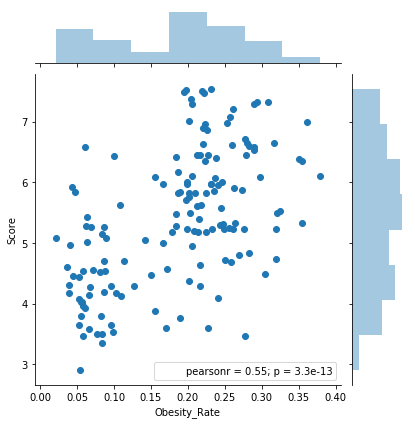

In [12]:
sns.jointplot(countries.Obesity_Rate, countries.Score)

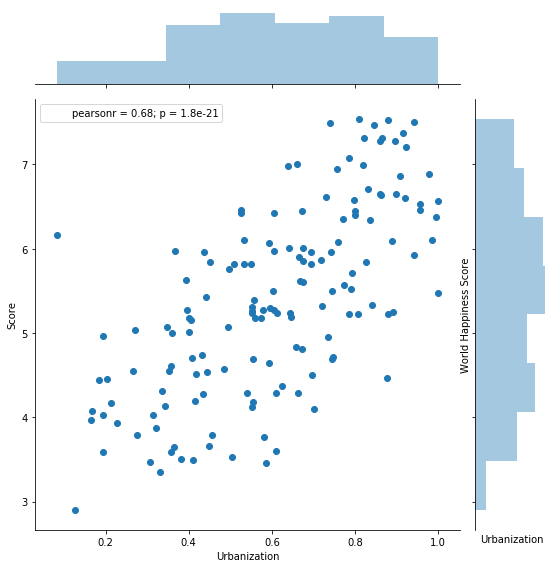

In [13]:
sns.jointplot(x='Urbanization', y='Score', data = countries, size = 8)
plt.xlabel('Urbanization')
plt.ylabel("World Happiness Score");
#plt.title('World Happiness Score vs. Urbanization')

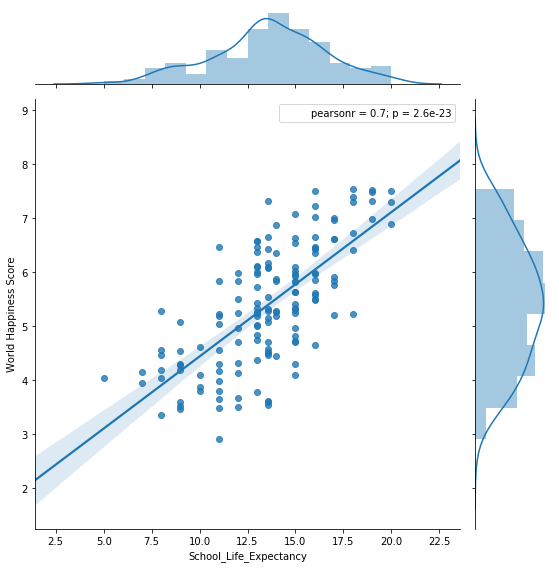

In [14]:
sns.jointplot(x='School_Life_Expectancy', y='Score', data = countries, kind = 'reg', size = 8)
plt.xlabel('School_Life_Expectancy')
plt.ylabel("World Happiness Score");
#plt.title('World Happiness Score vs. Urbanization')

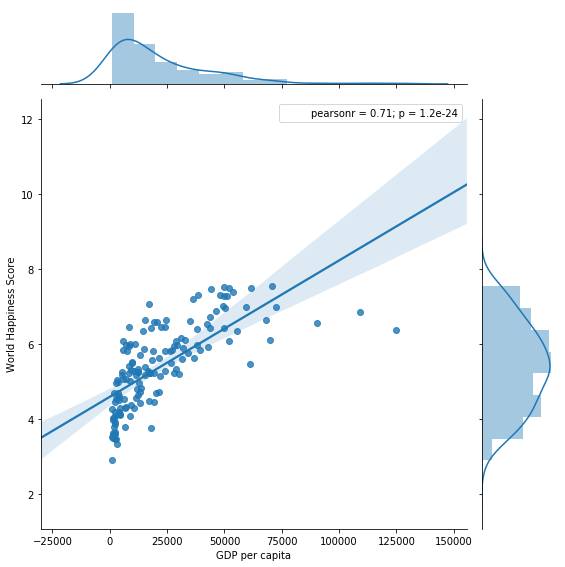

In [15]:
sns.jointplot(x='GDP_per_capita', y='Score', data = countries, kind = 'reg', size = 8)
plt.xlabel('GDP per capita')
plt.ylabel("World Happiness Score");
#plt.title('World Happiness Score vs. Urbanization')

Above: GDP per Capita doesn't appear to have a linear relationship with the World Happiness Score.  In fact, it looks exponential!

Below: A log transform of GDP per Capita helps transform the relationship into a more linear one.

In [16]:
countries['logGDP_per_capita'] = countries.GDP_per_capita.apply(np.log)

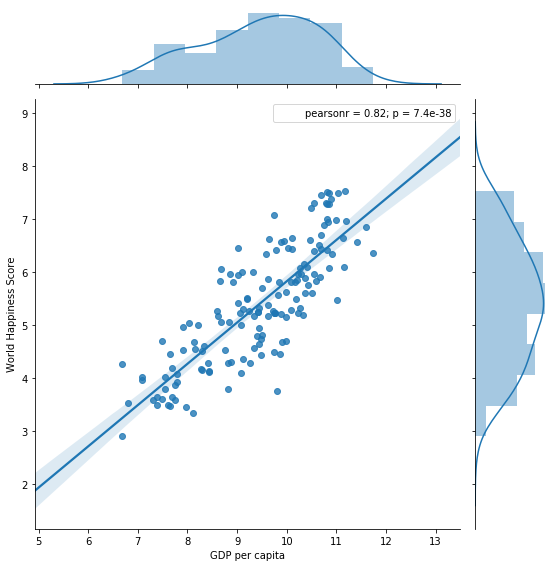

In [17]:
sns.jointplot(x='logGDP_per_capita', y='Score', data = countries, kind = 'reg', size = 8)
plt.xlabel('GDP per capita')
plt.ylabel("World Happiness Score");
plt.savefig('logGDPpercapita')

## Regression

Set up a intercept column for linear regression.

Drop GDP per capita, and use the log transform instead.

In [18]:
countries['intercept']=1
countries = countries.drop(['GDP_per_capita'],axis = 1)

### First Model: All features with absolute correlation over 0.3

In [19]:
model = sm.OLS(countries.Score,countries.iloc[:,2:])

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     42.87
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           1.21e-43
Time:                        14:20:41   Log-Likelihood:                -97.248
No. Observations:                 150   AIC:                             226.5
Df Residuals:                     134   BIC:                             274.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.2029      0.217      5.531      0.000       0.773       1.633
Freedom to make life choices     1.4524      0.394      3.682      0.000       0.672       2.233
Trust                            0.8125      0.533      1.523      0.130      -0.242       1.867
Support_Ratio                   -0.0082      0.005     -1.562      0.121      -0.018       0.002
Urbanization                     0.3141      0.330      0.952      0.343      -0.339       0.967
Get_Median_Age                   0.0060      0.014      0.420      0.675      -0.022       0.034
Life_Expectancy                  0.0235      0.012      1.909      0.058      -0.001       0.048
Fertility_Rate                   0.1164      0.082      1.420      0.158      -0.046       0.278
Hospital_Bed_Density            -0.0361      0.024     -1.476      0.142      -0.084       0.012
Access_To_Clean_Water           -0.2741      0.486     -0.564      0.574      -1.235       0.687
Obesity_Rate                     0.7568      0.763      0.992      0.323      -0.751       2.265
School_Life_Expectancy           0.0268      0.026      1.044      0.298      -0.024       0.078
Unemployment_Rate               -0.4483      0.361     -1.241      0.217      -1.163       0.266
Electrification_Rate             0.3907      0.349      1.119      0.265      -0.300       1.082
logGDP_per_capita                0.2245      0.090      2.494      0.014       0.046       0.403
intercept                       -1.5565      1.037     -1.501      0.136      -3.608       0.495
==============================================================================
Omnibus:                        6.702   Durbin-Watson:                   2.226
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.678
Skew:                          -0.392   Prob(JB):                       0.0355
Kurtosis:                       3.674   Cond. No.                     2.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
mean_squared_error(countries.Score,fit.predict(countries.iloc[:,2:]))

0.2141167788296103

There are some pretty high coefficient pvalues! Drop Get Median Age and Access to Clean Water.

In [21]:
countries = countries.drop(['Get_Median_Age', 'Access_To_Clean_Water'], axis = 1)

### Second Model:

In [22]:
model = sm.OLS(countries.Score,countries.iloc[:,2:])

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     50.02
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           2.94e-45
Time:                        14:20:41   Log-Likelihood:                -97.475
No. Observations:                 150   AIC:                             222.9
Df Residuals:                     136   BIC:                             265.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.2179      0.215      5.668      0.000       0.793       1.643
Freedom to make life choices     1.3726      0.370      3.709      0.000       0.641       2.105
Trust                            0.8623      0.524      1.644      0.102      -0.175       1.899
Support_Ratio                   -0.0086      0.005     -1.698      0.092      -0.019       0.001
Urbanization                     0.2896      0.322      0.898      0.371      -0.348       0.927
Life_Expectancy                  0.0240      0.012      2.027      0.045       0.001       0.047
Fertility_Rate                   0.1006      0.071      1.422      0.157      -0.039       0.241
Hospital_Bed_Density            -0.0307      0.021     -1.433      0.154      -0.073       0.012
Obesity_Rate                     0.7411      0.755      0.982      0.328      -0.752       2.234
School_Life_Expectancy           0.0288      0.024      1.193      0.235      -0.019       0.077
Unemployment_Rate               -0.4542      0.358     -1.268      0.207      -1.163       0.254
Electrification_Rate             0.2979      0.315      0.944      0.347      -0.326       0.922
logGDP_per_capita                0.2360      0.082      2.881      0.005       0.074       0.398
intercept                       -1.6552      1.019     -1.624      0.107      -3.671       0.361
==============================================================================
Omnibus:                        6.919   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                6.888
Skew:                          -0.405   Prob(JB):                       0.0319
Kurtosis:                       3.669   Cond. No.                     2.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
mean_squared_error(countries.Score,fit.predict(countries.iloc[:,2:]))

0.21476404996409579

Drop Obesity Rate due to high pvalue. Other stats look ok.

In [24]:
countries = countries.drop(['Obesity_Rate'], axis = 1)

### Third Model: 

In [25]:
model = sm.OLS(countries.Score,countries.iloc[:,2:])

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     54.12
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           6.24e-46
Time:                        14:20:41   Log-Likelihood:                -98.004
No. Observations:                 150   AIC:                             222.0
Df Residuals:                     137   BIC:                             261.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.2344      0.214      5.763      0.000       0.811       1.658
Freedom to make life choices     1.3008      0.363      3.586      0.000       0.583       2.018
Trust                            0.8417      0.524      1.606      0.110      -0.194       1.878
Support_Ratio                   -0.0074      0.005     -1.504      0.135      -0.017       0.002
Urbanization                     0.3979      0.303      1.314      0.191      -0.201       0.997
Life_Expectancy                  0.0245      0.012      2.070      0.040       0.001       0.048
Fertility_Rate                   0.1065      0.071      1.510      0.133      -0.033       0.246
Hospital_Bed_Density            -0.0351      0.021     -1.673      0.097      -0.077       0.006
School_Life_Expectancy           0.0328      0.024      1.380      0.170      -0.014       0.080
Unemployment_Rate               -0.4049      0.355     -1.141      0.256      -1.106       0.297
Electrification_Rate             0.4084      0.295      1.386      0.168      -0.174       0.991
logGDP_per_capita                0.2373      0.082      2.897      0.004       0.075       0.399
intercept                       -1.7831      1.011     -1.764      0.080      -3.782       0.216
==============================================================================
Omnibus:                        6.223   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                6.008
Skew:                          -0.386   Prob(JB):                       0.0496
Kurtosis:                       3.603   Cond. No.                     1.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
mean_squared_error(countries.Score,fit.predict(countries.iloc[:,2:]))

0.21628595039538179

Drop Unemployment Rate due to high pvalue. 

In [27]:
countries = countries.drop(['Unemployment_Rate'], axis = 1)

### Fourth Model:

In [28]:
model = sm.OLS(countries.Score,countries.iloc[:,2:])

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     58.79
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           1.50e-46
Time:                        14:20:41   Log-Likelihood:                -98.714
No. Observations:                 150   AIC:                             221.4
Df Residuals:                     138   BIC:                             257.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.2392      0.214      5.780      0.000       0.815       1.663
Freedom to make life choices     1.3993      0.353      3.967      0.000       0.702       2.097
Trust                            0.7993      0.523      1.528      0.129      -0.235       1.834
Support_Ratio                   -0.0071      0.005     -1.451      0.149      -0.017       0.003
Urbanization                     0.3732      0.302      1.234      0.219      -0.225       0.971
Life_Expectancy                  0.0273      0.012      2.359      0.020       0.004       0.050
Fertility_Rate                   0.1078      0.071      1.528      0.129      -0.032       0.247
Hospital_Bed_Density            -0.0327      0.021     -1.566      0.120      -0.074       0.009
School_Life_Expectancy           0.0326      0.024      1.367      0.174      -0.015       0.080
Electrification_Rate             0.3765      0.294      1.282      0.202      -0.204       0.957
logGDP_per_capita                0.2419      0.082      2.954      0.004       0.080       0.404
intercept                       -2.0877      0.976     -2.139      0.034      -4.018      -0.158
==============================================================================
Omnibus:                        5.470   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                5.394
Skew:                          -0.325   Prob(JB):                       0.0674
Kurtosis:                       3.663   Cond. No.                     1.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
mean_squared_error(countries.Score,fit.predict(countries.iloc[:,2:]))

0.21834233525544222

Drop Electrification Rate due to high pvalue.

In [30]:
countries = countries.drop(['Electrification_Rate'], axis = 1)

### Fifth Model:

In [31]:
model = sm.OLS(countries.Score,countries.iloc[:,2:])

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     64.21
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           4.08e-47
Time:                        14:20:41   Log-Likelihood:                -99.602
No. Observations:                 150   AIC:                             221.2
Df Residuals:                     139   BIC:                             254.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.2517      0.215      5.831      0.000       0.827       1.676
Freedom to make life choices     1.4093      0.353      3.987      0.000       0.710       2.108
Trust                            0.6299      0.507      1.241      0.217      -0.373       1.633
Support_Ratio                   -0.0070      0.005     -1.424      0.157      -0.017       0.003
Urbanization                     0.4307      0.300      1.437      0.153      -0.162       1.023
Life_Expectancy                  0.0304      0.011      2.681      0.008       0.008       0.053
Fertility_Rate                   0.0682      0.064      1.072      0.285      -0.058       0.194
Hospital_Bed_Density            -0.0321      0.021     -1.535      0.127      -0.074       0.009
School_Life_Expectancy           0.0318      0.024      1.332      0.185      -0.015       0.079
logGDP_per_capita                0.2677      0.080      3.365      0.001       0.110       0.425
intercept                       -2.1805      0.976     -2.235      0.027      -4.110      -0.252
==============================================================================
Omnibus:                        6.095   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                6.493
Skew:                          -0.319   Prob(JB):                       0.0389
Kurtosis:                       3.794   Cond. No.                     1.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
mean_squared_error(countries.Score,fit.predict(countries.iloc[:,2:]))

0.22094433909254302

Drop Fertility Rate and Support Ratio due to low pvalue.

In [33]:
countries = countries.drop(['Fertility_Rate','Support_Ratio'], axis = 1)

### Sixth Model:

In [34]:
model = sm.OLS(countries.Score,countries.iloc[:,2:])

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     79.39
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           2.12e-48
Time:                        14:20:41   Log-Likelihood:                -101.15
No. Observations:                 150   AIC:                             220.3
Df Residuals:                     141   BIC:                             247.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.2623      0.213      5.931      0.000       0.842       1.683
Freedom to make life choices     1.3692      0.354      3.871      0.000       0.670       2.069
Trust                            0.6232      0.480      1.299      0.196      -0.325       1.572
Urbanization                     0.4184      0.298      1.405      0.162      -0.170       1.007
Life_Expectancy                  0.0258      0.008      3.052      0.003       0.009       0.043
Hospital_Bed_Density            -0.0286      0.020     -1.406      0.162      -0.069       0.012
School_Life_Expectancy           0.0434      0.023      1.904      0.059      -0.002       0.088
logGDP_per_capita                0.2299      0.076      3.006      0.003       0.079       0.381
intercept                       -1.5546      0.474     -3.279      0.001      -2.492      -0.617
==============================================================================
Omnibus:                        5.658   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                5.811
Skew:                          -0.313   Prob(JB):                       0.0547
Kurtosis:                       3.733   Cond. No.                         985.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
mean_squared_error(countries.Score,fit.predict(countries.iloc[:,2:]))

0.22556430525731561

Drop Trust, Urbanization and Hospital Bed Density due to high pvalues.

In [36]:
countries = countries.drop(['Trust','Urbanization','Hospital_Bed_Density'], axis = 1)

In [37]:
model = sm.OLS(countries.Score,countries.iloc[:,2:])

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     121.6
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           7.17e-50
Time:                        14:20:41   Log-Likelihood:                -105.11
No. Observations:                 150   AIC:                             222.2
Df Residuals:                     144   BIC:                             240.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.1643      0.206      5.642      0.000       0.756       1.572
Freedom to make life choices     1.6086      0.306      5.261      0.000       1.004       2.213
Life_Expectancy                  0.0285      0.009      3.345      0.001       0.012       0.045
School_Life_Expectancy           0.0375      0.022      1.700      0.091      -0.006       0.081
logGDP_per_capita                0.2841      0.068      4.188      0.000       0.150       0.418
intercept                       -1.9210      0.400     -4.802      0.000      -2.712      -1.130
==============================================================================
Omnibus:                        5.864   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.953
Skew:                          -0.332   Prob(JB):                       0.0510
Kurtosis:                       3.715   Cond. No.                         740.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
mean_squared_error(countries.Score,fit.predict(countries.iloc[:,2:]))

0.23777440380352904

The pvalues all look relatively good! School Life Expectancy is a little high, but I'm interested in that relationship, and it's not unreasonable, so I'm going to keep it.

Pvalues for the Omnibus and Jarque Bera indicate that residuals are relatively normally distributed.

An r2 of ~0.802 indicates that the model can account for about 80% of the variation in the target. This is pretty good!

## Resulting Model with Final Feature Set

Try out the resulting model using a train test split.

In [39]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(countries.iloc[:,2:], countries.Score, test_size=0.3)

In [40]:
model = sm.OLS(y_train,X_train)

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     82.28
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           1.10e-33
Time:                        14:20:41   Log-Likelihood:                -76.419
No. Observations:                 105   AIC:                             164.8
Df Residuals:                      99   BIC:                             180.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.1019      0.254      4.344      0.000       0.599       1.605
Freedom to make life choices     1.7970      0.377      4.771      0.000       1.050       2.544
Life_Expectancy                  0.0279      0.011      2.566      0.012       0.006       0.049
School_Life_Expectancy           0.0266      0.027      1.002      0.319      -0.026       0.079
logGDP_per_capita                0.2851      0.088      3.243      0.002       0.111       0.460
intercept                       -1.7153      0.487     -3.525      0.001      -2.681      -0.750
==============================================================================
Omnibus:                        3.961   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.384
Skew:                          -0.332   Prob(JB):                        0.184
Kurtosis:                       3.577   Cond. No.                         735.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
mean_squared_error(y_test,fit.predict(X_test))

0.21435143498371359

In [42]:
mean_squared_error(y_train,fit.predict(X_train))

0.25100613803397936

## Cross Validation:

In [43]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(countries.iloc[:,2:-1], countries.Score, test_size=0.3)

lr.fit(X_train, y_train)

lr.score(X_test, y_test)


0.80740931669120819

In [44]:
# 10-fold cross-validation
reg = LinearRegression()
r2_scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
mse_scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='mean_squared_error')

print('r2',r2_scores)
print('mse',-mse_scores)

r2 [ 0.92087456  0.43636304  0.7570575   0.59479689  0.63125384  0.86396683
  0.74856958  0.83029691  0.91578292  0.79967087]
mse [ 0.13126327  0.37773898  0.38342225  0.43099023  0.28640482  0.12896553
  0.43518588  0.27732741  0.11634335  0.22447429]


/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sampl

In [45]:
cross_val_score(reg, X_train, y_train, cv=10, scoring='r2').mean()
cross_val_score(reg, X_train, y_train, cv=10, scoring='mean_squared_error').mean()

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sampl

-0.27921160278113694

Cross validation shows a drop in r-squared, which is expected when sampling out of sample data.

## Regularization:

### ElasticNetCV

In [46]:
encv = ElasticNetCV(cv = 10, alphas = [1e-5,1e-3,1,1e3,1e5])
encv.fit(X_train, y_train)
encv.score(X_test, y_test)


0.80821667124775987

In [47]:
mean_squared_error(y_test,encv.predict(X_test))

0.2055561773810119

In [48]:
encv.alphas_[1]

1000.0

In [49]:
encv.coef_

array([ 1.18353872,  1.66696871,  0.03714887,  0.03136351,  0.23660231])

### RidgeCV

In [50]:
alpha = np.array([1e-6,1e-5,1e-3,1e-4])
for a in alpha:

    rcv = RidgeCV(cv = 10, alphas = [a])
    rcv.fit(X_train, y_train)
    print(a, '----','r squared: ',rcv.score(X_test, y_test), ' mse(test): ', mean_squared_error(y_test,rcv.predict(X_test)))

1e-06 ---- r squared:  0.807409329373  mse(test):  0.206421498213
1e-05 ---- r squared:  0.807409443508  mse(test):  0.206421375882
0.001 ---- r squared:  0.807421977901  mse(test):  0.206407941336
0.0001 ---- r squared:  0.807410584671  mse(test):  0.206420152766


In [51]:
mean_squared_error(y_test,rcv.predict(X_test))

0.20642015276624098

In [52]:
rcv.alpha_

0.0001

In [53]:
rcv.coef_

array([ 1.20799989,  1.72521052,  0.03696749,  0.03054484,  0.23287813])

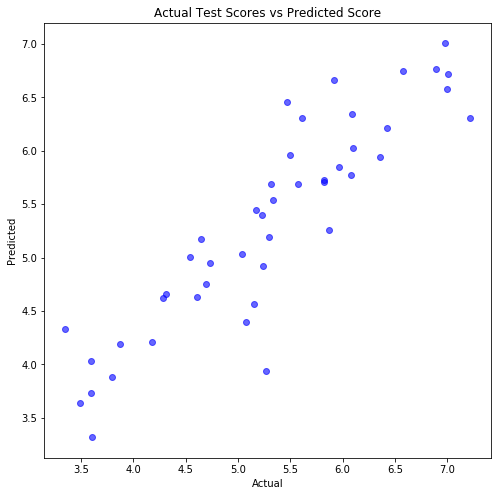

In [54]:

plt.figure(figsize=(8,8))
plt.scatter(y_test,rcv.predict(X_test), color = 'b', alpha = 0.6)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Actual Test Scores vs Predicted Score');
plt.savefig('ActualvPredicted')

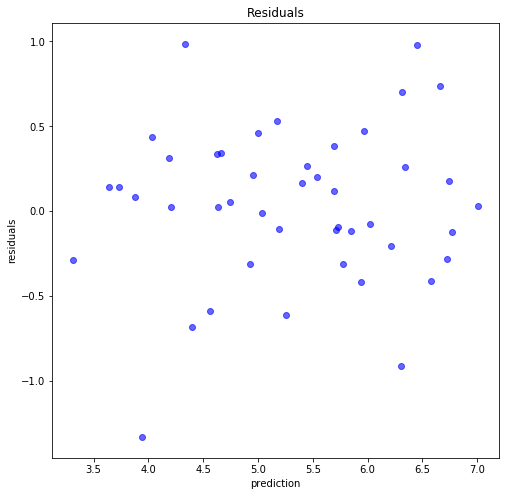

In [55]:
residual = rcv.predict(X_test) - y_test

plt.figure(figsize=(8,8))
plt.scatter(rcv.predict(X_test), residual, color = 'b', alpha = 0.6)
plt.title("Residuals")
plt.xlabel("prediction")
plt.ylabel("residuals")
plt.savefig('ResidualsvPrediction')

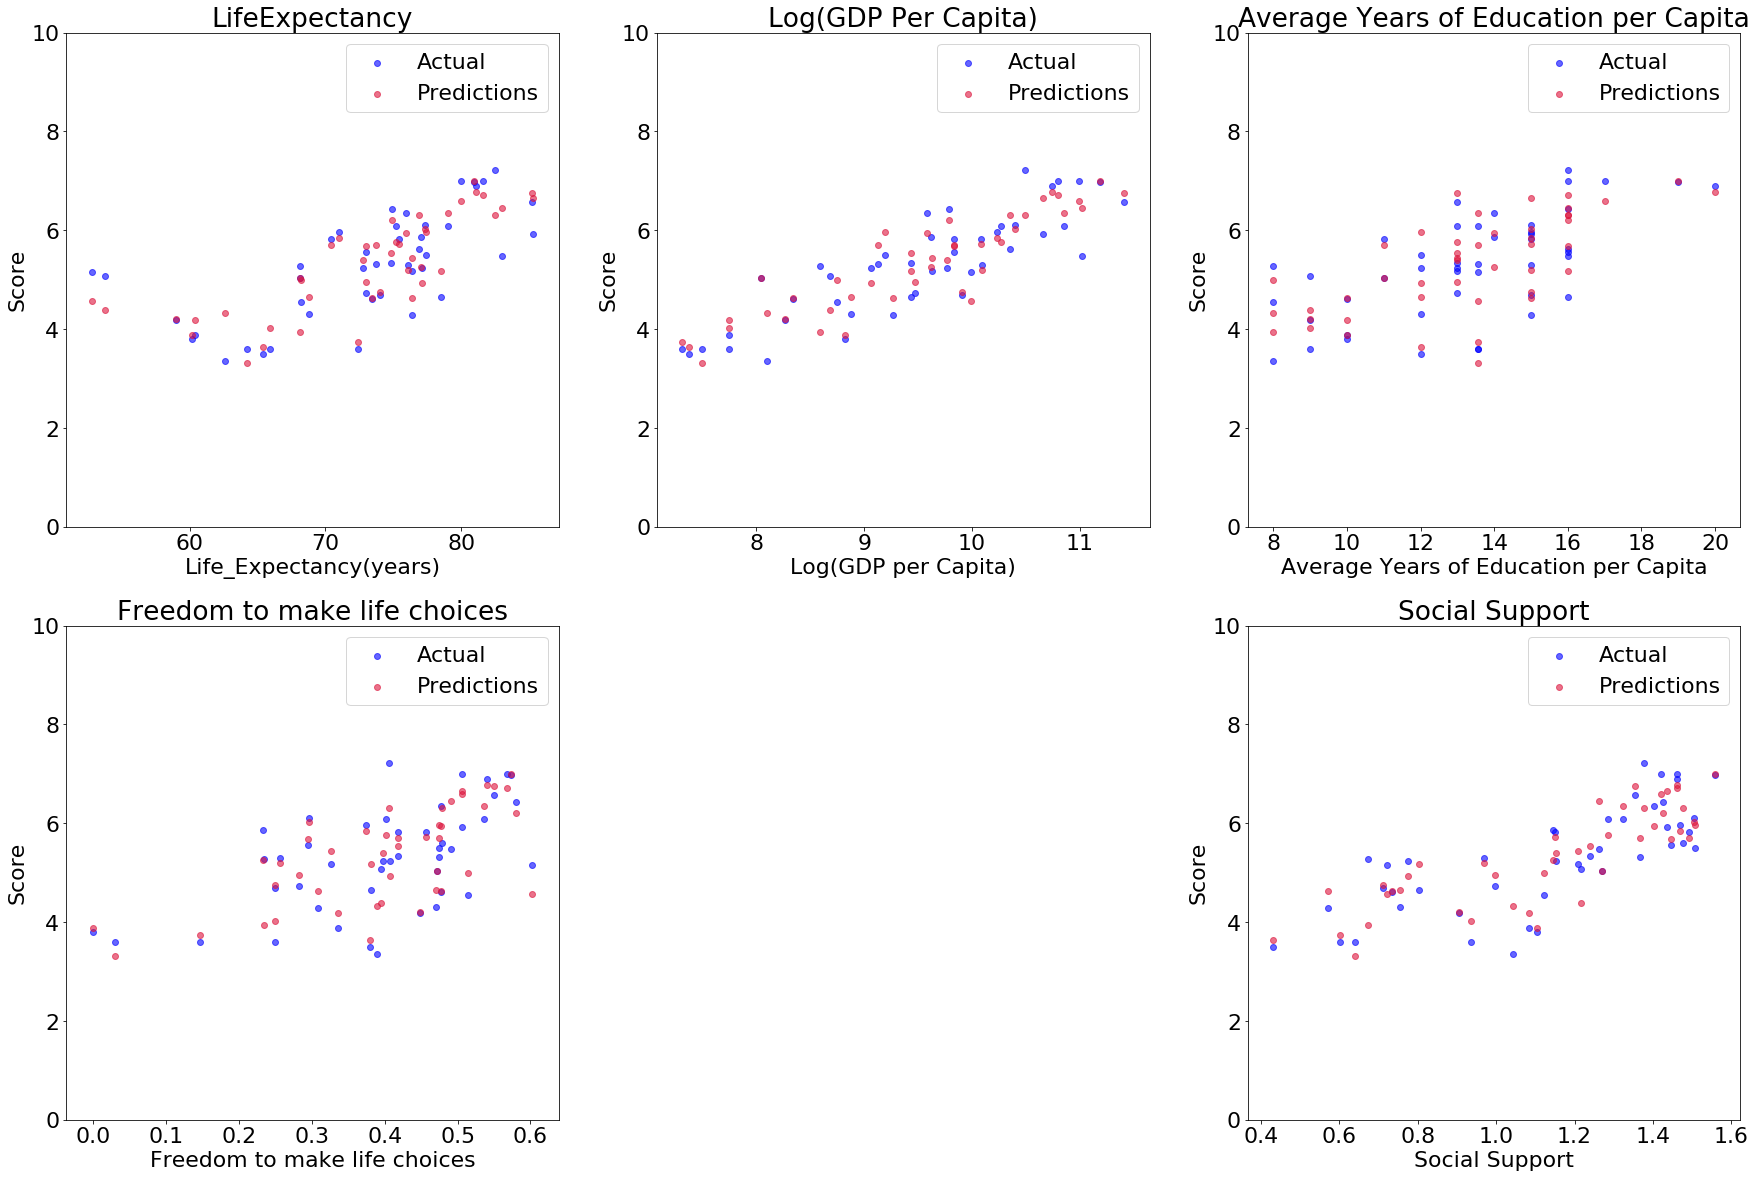

In [56]:
pred = rcv.predict(X_test)
residual = rcv.predict(X_test) - y_test
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(30,20))

plt.subplot(2, 3, 1)
plt.scatter(X_test['Life_Expectancy'],y_test, color = 'b', label = 'Actual', alpha = 0.6)
plt.scatter(X_test['Life_Expectancy'], pred, color='crimson',linewidth=1, label = 'Predictions', alpha = 0.6)
plt.title("LifeExpectancy")
plt.xlabel("Life_Expectancy(years)")
plt.ylabel("Score")
plt.legend()
plt.ylim(0,10)

plt.subplot(2, 3, 2)
plt.scatter(X_test['logGDP_per_capita'],y_test, color = 'b', label = 'Actual', alpha = 0.6)
plt.scatter(X_test['logGDP_per_capita'], pred, color='crimson',linewidth=1, label = 'Predictions', alpha = 0.6)
plt.title("Log(GDP Per Capita)")
plt.xlabel("Log(GDP per Capita)")
plt.ylabel("Score")
plt.legend()
plt.ylim(0,10)

plt.subplot(2, 3, 3)
plt.scatter(X_test['School_Life_Expectancy'],y_test, color = 'b', label = 'Actual', alpha = 0.6)
plt.scatter(X_test['School_Life_Expectancy'], pred, color='crimson',linewidth=1, label = 'Predictions', alpha = 0.6)
plt.title("Average Years of Education per Capita")
plt.xlabel("Average Years of Education per Capita")
plt.ylabel("Score")
plt.legend()
plt.ylim(0,10)

plt.subplot(2, 3, 4)
plt.scatter(X_test['Freedom to make life choices'],y_test, color = 'b', label = 'Actual', alpha = 0.6)
plt.scatter(X_test['Freedom to make life choices'], pred, color='crimson',linewidth=1, label = 'Predictions', alpha = 0.6)
plt.title("Freedom to make life choices")
plt.xlabel("Freedom to make life choices")
plt.ylabel("Score")
plt.legend()
plt.ylim(0,10)

plt.subplot(2, 3, 6)
plt.scatter(X_test['Social support'],y_test, color = 'b', label = 'Actual', alpha = 0.6)
plt.scatter(X_test['Social support'], pred, color='crimson',linewidth=1, label = 'Predictions', alpha = 0.6)
plt.title("Social Support")
plt.xlabel("Social Support")
plt.ylabel("Score")
plt.legend()
plt.ylim(0,10)

plt.savefig('RegressionFit')

In [ ]:

plt.figure(figsize=(10,10))
plt.scatter(X_test['School_Life_Expectancy'],y_test, color = 'b', label = 'Actual', alpha = 0.6)
plt.scatter(X_test['School_Life_Expectancy'], pred, color='crimson',linewidth=1, label = 'Predictions', alpha = 0.6)
plt.title("Regression fit - Average Years of Education per Capita")
plt.xlabel("Average Years of Education per Capita")
plt.ylabel("Score")
plt.legend()
plt.ylim(0,10)

plt.savefig('RegressionFitEducation')

### LassoCV

In [58]:
lcv = LassoCV(cv = 10)
lcv.fit(X_train, y_train)
lcv.score(X_test, y_test)

0.8071624726252441

In [59]:
mean_squared_error(y_test,lcv.predict(X_test))

0.20668608288663923

In [60]:
lcv.alpha_

0.0074478022645502635

## Conclusion

RidgeCV fit the best of all the Regularized Cross Validated Fits in terms of r squared.

In [65]:
coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(rcv.coef_)})

In [62]:
coefficients = coefficients.sort_values('Coefficients',ascending = False).reset_index(drop = True)
coefficients

,Coefficients,Feature
0,1.725211,Freedom to make life choices
1,1.208000,Social support
2,0.232878,logGDP_per_capita
3,0.036967,Life_Expectancy
4,0.030545,School_Life_Expectancy


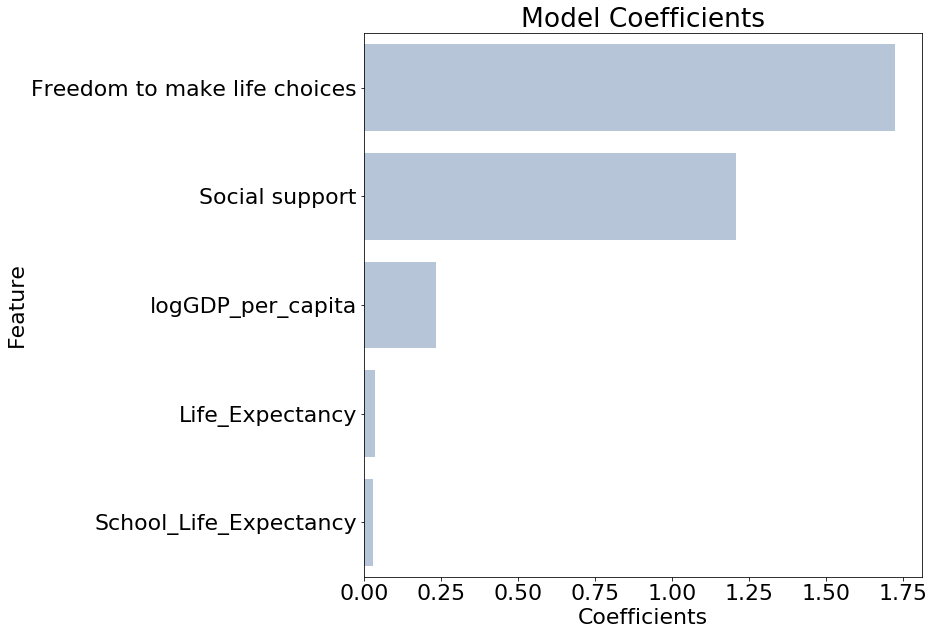

In [63]:
f, ax = plt.subplots(1,1,figsize=(10,10))

sns.barplot(x="Coefficients", y="Feature", data=coefficients,label="Total",color='lightsteelblue')
plt.title('Model Coefficients')

plt.savefig('coefficients',bbox_inches='tight')

The magnitude of the coefficients show how the features in my final model work together to build a relationship with World Happiness Score. 

While at first glance it looks like `Freedom to make life choices` and `Social support` have the most impact on Happiness Score, it's important to note that each of the features are on different scales of magnitude:

Feature | Min | Max
--------|-----|------
`Freedom to make life choices` | 0 | 1
`Social Support` | 0 | 1
`logGDP_per_capita`| 6.68 | 11.74
`Life_Expectancy` | 50.6 | 85.3
`School_Life_Expectancy` | 5 | 20

Feature | Change in feature | Corresponding change in Happiness Score
--------|-------------------|----------------------------------------
`Freedom to make life choices` | An increase of 0.1 | An increase of 0.1725
`Social Support` | An increase of 0.1 | An increase of 0.1208
(unlogged) `GDP per capita` | A 100% increase | An increase of 0.232
`Life Expectancy` | An increase of 5 years | An increase of 0.185
`School Life Expectancy` | An increase of 5 years | An increase of 0.153